This script visualizes the results of a grid search over Berp parameters.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# results_dir = Path("../results/gillis2021/models_berp_grid/berp-fixed/")
# results_dir = Path("../work/2b/cda8e6c76a9235517148309c3afb33/")
# results_dir = Path("../work/6a/13acff29799f3c1dc2122961c28d9b/")
results_dir = Path("../work/a0/090a725e038a2820a9bbaf079e95a9/")

In [3]:
trial_df_paths = list(results_dir.glob("**/trials.csv"))
trial_dfs = [pd.read_csv(path) for path in trial_df_paths]
trials_df = pd.concat(trial_dfs, keys=trial_df_paths)
trials_df

number     value  \
../work/a0/090a725e038a2820a9bbaf079e95a9/berp-... 0         0  0.110265   
                                                   1         1  0.114267   
                                                   2         2  0.125839   
                                                   3         3  0.137570   
                                                   4         4  0.120519   
...                                                        ...       ...   
../work/a0/090a725e038a2820a9bbaf079e95a9/berp-... 995     995  0.137874   
                                                   996     996  0.137538   
                                                   997     997  0.137862   
                                                   998     998  0.138005   
                                                   999     999  0.138100   

                                                                    datetime_start  \
../work/a0/090a725e038a2820a9bbaf079e95a9/berp-... 0    2022-09-27 19:08:06.910838   
                                                   1    2022-09-27 19:08:42.468762   
                                                   2    2022-09-27 19:09:17.570503   
                                                   3    2022-09-27 19:09:50.018853   
                                                   4    2022-09-27 19:10:21.101248   
...                                                                            ...   
../work/a0/090a725e038a2820a9bbaf079e95a9/berp-... 995  2022-09-28 14:27:14.979970   
                                                   996  2022-09-28 14:27:33.009766   
                                                   997  2022-09-28 14:27:51.061538   
                                                   998  2022-09-28 14:28:09.110638   
                                                   999  2022-09-28 14:28:27.173689   

                                                                 datetime_complete  \
../work/a0/090a725e038a2820a9bbaf079e95a9/berp-... 0    2022-09-27 19:08:25.885262   
                                                   1    2022-09-27 19:09:04.971731   
                                                   2    2022-09-27 19:09:38.127983   
                                                   3    2022-09-27 19:10:08.049331   
                                                   4    2022-09-27 19:10:39.584675   
...                                                                            ...   
../work/a0/090a725e038a2820a9bbaf079e95a9/berp-... 995  2022-09-28 14:27:33.007231   
                                                   996  2022-09-28 14:27:51.060100   
                                                   997  2022-09-28 14:28:09.109158   
                                                   998  2022-09-28 14:28:27.171580   
                                                   999  2022-09-28 14:28:45.237993   

                                                                      duration  \
../work/a0/090a725e038a2820a9bbaf079e95a9/berp-... 0    0 days 00:00:18.974424   
                                                   1    0 days 00:00:22.502969   
                                                   2    0 days 00:00:20.557480   
                                                   3    0 days 00:00:18.030478   
                                                   4    0 days 00:00:18.483427   
...                                                                        ...   
../work/a0/090a725e038a2820a9bbaf079e95a9/berp-... 995  0 days 00:00:18.027261   
                                                   996  0 days 00:00:18.050334   
                                                   997  0 days 00:00:18.047620   
                                                   998  0 days 00:00:18.060942   
                                                   999  0 days 00:00:18.064304   

                                                        params_encoder__alpha  \
../work/a0/

In [4]:
param_cols = [c for c in trials_df.columns if c.startswith("params_")]
melted_df = trials_df[["value"] + param_cols].melt(id_vars="value", value_name="param_val")

In [5]:
log_param_cols = [f"params_{x}" for x in ["encoder__alpha", "encoder__init_scale", "encoder__optim__learning_rate"]]
melted_log_df = melted_df[melted_df.variable.isin(log_param_cols)]
melted_norm_df = melted_df[~melted_df.variable.isin(log_param_cols)]

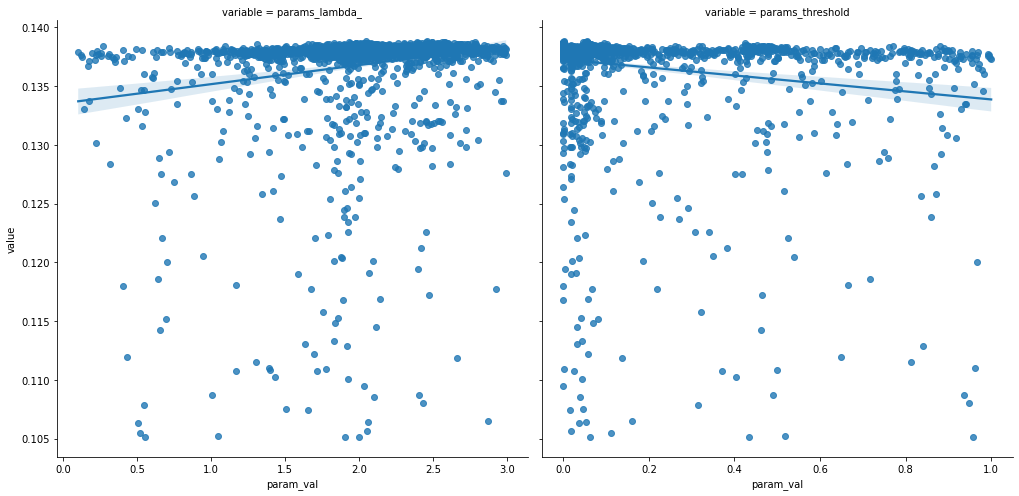

In [6]:
g = sns.FacetGrid(data=melted_norm_df, col="variable", col_wrap=3, sharex=False, sharey=True, height=7)
g.map(sns.regplot, "param_val", "value")

/tmp/ipykernel_47515/3795883258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_log_df["log_param_val"] = np.log10(melted_log_df.param_val)


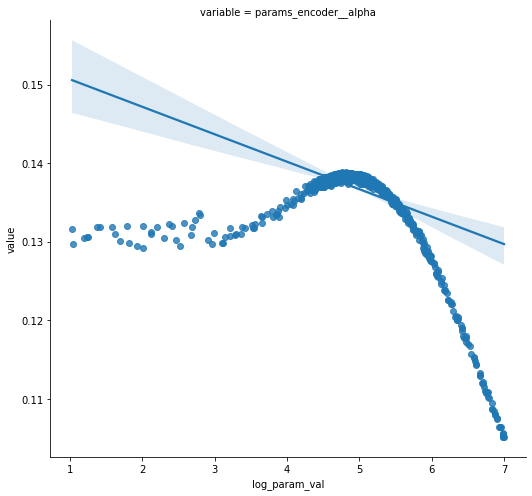

In [7]:
melted_log_df["log_param_val"] = np.log10(melted_log_df.param_val)
g = sns.FacetGrid(data=melted_log_df, col="variable", col_wrap=3, sharex=False, sharey=True, height=7)
g.map(sns.regplot, "log_param_val", "value")

<AxesSubplot:xlabel='params_threshold', ylabel='value'>

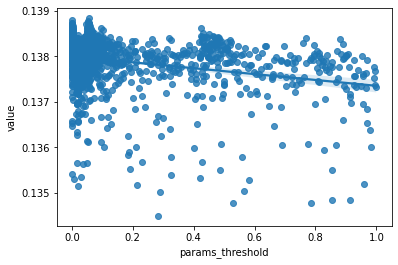

In [17]:
sns.regplot(data=trials_df[(trials_df.params_encoder__alpha > 10 ** 4.25) & (trials_df.params_encoder__alpha < 10 ** 5.5)],
            x="params_threshold", y="value")

In [9]:
trials_df["log_params_encoder__alpha"] = np.log10(trials_df.params_encoder__alpha)

In [10]:
# plt.subplots(figsize=(10, 10))
# sns.kdeplot(data=trials_df[trials_df.value > 0.026], x="params_threshold", y="log_params_encoder__alpha",
#             hue="value")

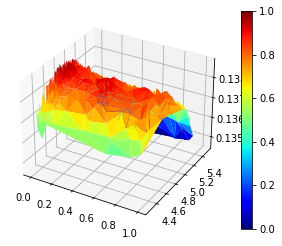

In [18]:
ax = plt.subplot(projection='3d')
cm = plt.cm.ScalarMappable(cmap=plt.cm.jet)
to_plot = trials_df[(trials_df.log_params_encoder__alpha > 4.25) & (trials_df.log_params_encoder__alpha < 5.5)]
ax.plot_trisurf(to_plot.params_threshold, to_plot.log_params_encoder__alpha,
                to_plot.value, cmap=plt.cm.jet)
plt.colorbar(cm, ax=ax)
plt.show()

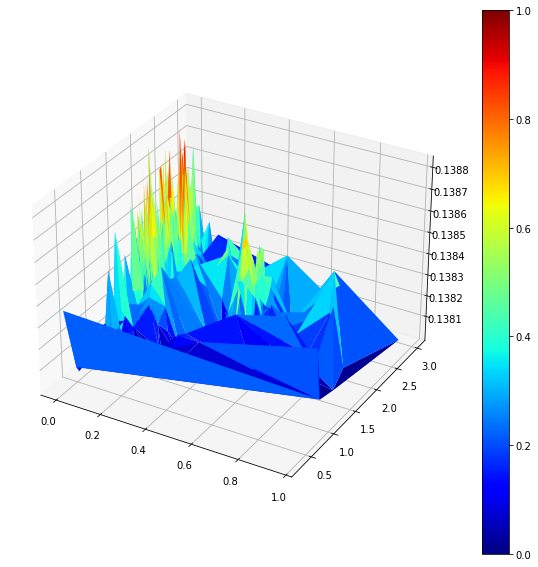

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
cm = plt.cm.ScalarMappable(cmap=plt.cm.jet)
to_plot = trials_df[trials_df.value > 0.138]
ax.plot_trisurf(to_plot.params_threshold, to_plot.params_lambda_,
                to_plot.value, cmap=plt.cm.jet)
plt.colorbar(cm, ax=ax)
plt.show()

In [13]:
trials_df["log_params_encoder__alpha_bin"] = pd.qcut(trials_df.log_params_encoder__alpha, q=10)
trials_df["params_threshold_bin"] = pd.qcut(trials_df.params_threshold, 50, labels=False)

<AxesSubplot:xlabel='params_threshold_bin', ylabel='value'>

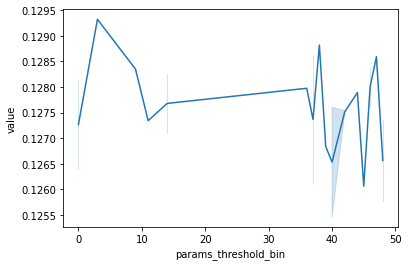

In [14]:
sns.lineplot(data=trials_df[(trials_df.log_params_encoder__alpha > 5.9) & (trials_df.log_params_encoder__alpha < 6.1)],
             x="params_threshold_bin", y="value", errorbar="se")#, hue="log_params_encoder__alpha_bin")